## The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

### Credit Card Data from book "Econometric Analysis".

### Preparation

- Create the target variable by mapping yes to 1 and no to 0.

- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [34]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-06 09:39:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv.1’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.02s   

2022-10-06 09:39:10 (3.06 MB/s) - ‘AER_credit_card_data.csv.1’ saved [73250/73250]



In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold

In [36]:
df = pd.read_csv('AER_credit_card_data.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [38]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [39]:
df['card'] = df['card'].apply(lambda x: 1 if x == 'yes' else 0)

In [40]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

### Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.

- Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- **reports**

- dependents

- active

- share



In [41]:
selected_features = ['reports', 'dependents', 'active', 'share', 'card']

In [42]:
df_train = df_train[selected_features]
df_test = df_test[selected_features]
df_val = df_val[selected_features]
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values
del df_train['card']
del df_val['card']
del df_test['card']
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [43]:
roc_auc = {}
for i in df_train.columns:
    model = LogisticRegression()
    model.fit(df_train[i].to_frame(), y_train)
    y_pred = model.predict(df_test[i].to_frame())
    roc_auc[i] = (roc_auc_score(y_test, y_pred))

In [44]:
roc_auc

{'reports': 0.6616161616161615, 'dependents': 0.5, 'active': 0.5, 'share': 0.5}

Training the model

From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [45]:
columns = [
    "reports", 
    "age", 
    "income", 
    "share", 
    "expenditure", 
    "dependents", 
    "months", 
    "majorcards", 
    "active", 
    "owner", 
    "selfemp"]

In [46]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [47]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

df_train = df_train[columns]
df_test = df_test[columns]
df_val = df_val[columns]

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [48]:
train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test[columns].to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

### Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615

- **0.515**

- 0.715

- 0.995

In [49]:
roc_auc_score(y_test, y_pred).round(3)

0.505

### Question 3

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

- 0.1

- **0.3**

- 0.6

- 0.8

In [50]:
thresholds = np.linspace(0, 1, 101)

In [51]:
scores = []

for t in thresholds:  
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()

    scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

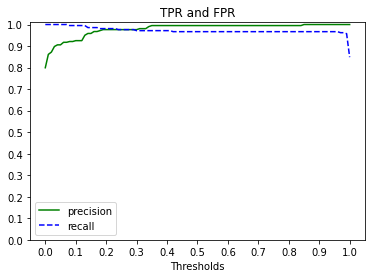

In [52]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='green', linestyle='solid', label='precision')
plt.plot(df_scores.threshold, df_scores.recall, color='blue', linestyle='dashed', label='recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')


plt.show()

### Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F<sub>1</sub>:

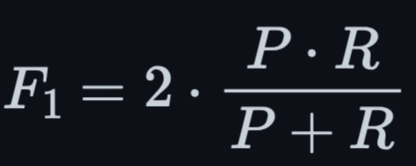

Where P is precision and R is recall.

Let's compute  for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F<sub>1</sub> is maximal?

- 0.1

- **0.4**

- 0.6

- 0.7


In [53]:
scores = []

for t in thresholds:  
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()

    scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores["F1"] = 2*df_scores['precision']*df_scores['recall']/(df_scores['precision']+df_scores['recall'])

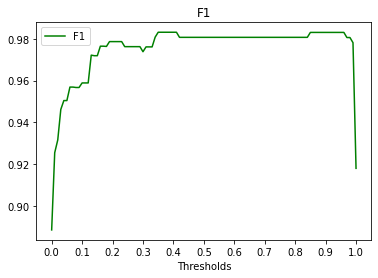

In [54]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.F1, color='green', linestyle='solid', label='F1')

plt.legend()

plt.xticks(np.linspace(0, 1, 11))


plt.xlabel('Thresholds')
plt.title('F1')


plt.show()

### Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard devidation of the AUC scores across different folds?

- **0.003**

- 0.014

- 0.09

- 0.24

In [55]:
def train(df, y):
    cat = df[columns].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[columns].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [56]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [57]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.card.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.card.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [58]:
np.array(aucs).round(3)

array([0.994, 0.994, 0.994, 1.   , 1.   ])

In [59]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.996 ± 0.003


### Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

- 0.01

- 0.1

- **1**

- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [60]:
models = {}
def train(df, y):
    cat = df[columns].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)
    
    for c in [0.01, 0.1, 1, 10]:
        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X, y)
        models[c] = model

    return dv, models

In [61]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [64]:
dv, models = train(df_train, y_train)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.9961738598102234

## Save model

In [65]:
import pickle

In [67]:
output_file = f'model.bin'

In [70]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [ ]:
# another way to open the file
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## Load the model

In [ ]:
import pickle

In [71]:
with open(output_file, 'rb') as f_out:
    dv, model = pickle.load(f_out)

In [72]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [74]:
customer = {
    'reports': 0,
    'age':37.666,
    'income': 4.52,
    'share': 0.033,
    'expenditure': 124.98,
    'owner': 'yes',
    'selfmp': 'no',
    'dependents': 3,
    'months': 54,
    'majorcards': 1,
    'active': 12
}

In [75]:
X = dv.transform([customer])

In [76]:
model.predict_proba(X)[0,1]

1.0

In [30]:
aucs = {}
rocauc_list = []
for c, model in models.items():
    rocauc_list = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train.card.values

        df_val = df_train_full.iloc[val_idx]
        y_val = df_val.card.values

        dv, models = train(df_train, y_train)

        y_pred = predict(df_val, dv, model)

        rocauc = roc_auc_score(y_val, y_pred)
        rocauc_list.append(rocauc)
    
    
    aucs[c] = rocauc_list

In [31]:
for c, rocauc in aucs.items():
    print('c_value = %0.3f std_auc ± %0.3f' %  (c, np.std(rocauc).round(3)))
#     print('auc = %0.3f ± %0.3f' % (c, np.mean(rocauc), np.std(rocauc)))

c_value = 0.010 std_auc ± 0.005
c_value = 0.100 std_auc ± 0.003
c_value = 1.000 std_auc ± 0.002
c_value = 10.000 std_auc ± 0.002
